# 1.Reading and Understanding the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Online_Retail.csv",encoding='unicode_escape',sep=",")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Yes,we can see two columns with null value Description and CustomerID,So for quantity wise check let's see their percentage

In [4]:
round(100*(df.isnull().sum()/len(df)),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

# 2.Cleaning the data

Here as the CustomeID is an important column so we can not drop the column so let's drop the rows and same will be done with the Description column

In [5]:
df = df[~df.CustomerID.isnull()]

In [6]:
df.shape

(406829, 8)

In [7]:
# Sanity Check for the null values

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Let's convert the InvoiceDate column data type to the date format

In [8]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate,format="%d-%m-%Y %H:%M")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


Data seems to be clean and good to go with the next step

# 3.Prepration for the model

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


###  (Monetary): Total amount of transactions (revenue contributed)

In [10]:
df["amount"] = df["Quantity"]*df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Now let's group by the revenue contributed Customer wise

In [11]:
# Monetary

grp_df = df.groupby("CustomerID")["amount"].sum()
grp_df = grp_df.reset_index()
grp_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [12]:
# Frequency
freq = df.groupby("CustomerID")["InvoiceNo"].count()
freq = freq.reset_index()
freq.columns=["CustomerID","Frequency"]
freq.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


Let's merge the monetary and frquenct Dataframe

In [13]:
grp_df = pd.merge(grp_df,freq,on = "CustomerID",how = "inner")
grp_df.head()

,CustomerID,amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [14]:
# Recency
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
# Compute the max date

max_date = max(df.InvoiceDate)
max_date

Timestamp('2011-12-09 12:50:00')

In [16]:
# Let's compute the difference
df["day_diff"] = max_date-df["InvoiceDate"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,day_diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [17]:
last_purc = df.groupby("CustomerID")["day_diff"].min()
last_purc =last_purc.reset_index()
last_purc.columns =["CustomerID","recency"]
last_purc.head()

,CustomerID,recency
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [18]:
grp_df = pd.merge(grp_df,last_purc,on = "CustomerID",how = "inner")
grp_df.head()

,CustomerID,amount,Frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [19]:
import datetime as dt

In [20]:
grp_df.recency = grp_df.recency.dt.days
grp_df.head()

,CustomerID,amount,Frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


#### Outlier treatment

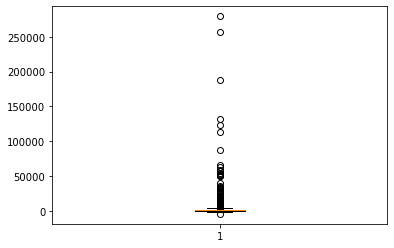

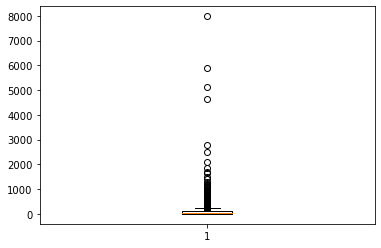

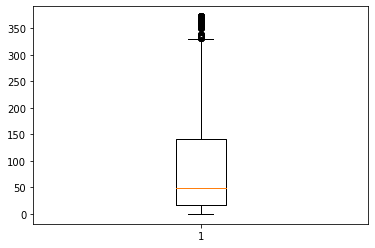

In [21]:
for i in ["amount","Frequency","recency"]:
    plt.boxplot(grp_df[i])
    plt.show()

In [22]:
for i in ["amount","Frequency","recency"]:
    Q1 = grp_df[i].quantile(0.05)
    Q3 = grp_df[i].quantile(0.95)
    IQR = Q3 - Q1
    grp_df = grp_df[(grp_df[i] >= Q1 - 1.5*IQR) & (grp_df[i] <= Q3 + 1.5*IQR)]

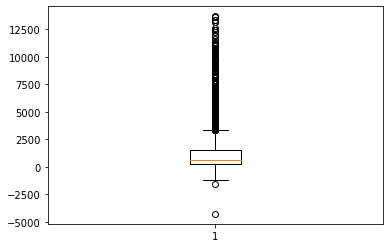

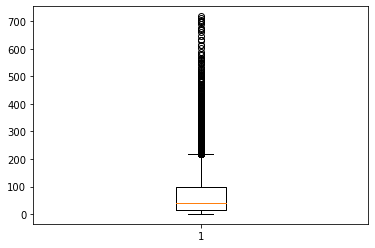

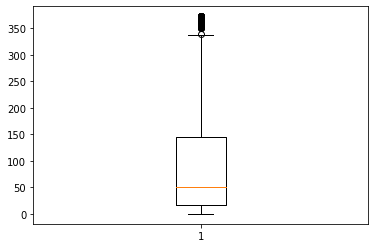

In [23]:
# Sanity Check

for i in ["amount","Frequency","recency"]:
    plt.boxplot(grp_df[i])
    plt.show()

In [24]:
grp_df.head()

,CustomerID,amount,Frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# Rescaling
scaler = StandardScaler()
grp_scaled_df = grp_df[['amount', 'Frequency', 'recency']]
grp_scaled_df = scaler.fit_transform(grp_scaled_df)
grp_scaled_df.shape

(4293, 3)

In [27]:
grp_scaled_df = pd.DataFrame(grp_scaled_df)
grp_scaled_df.columns = ['amount', 'Frequency', 'recency']
grp_scaled_df.head()

,amount,Frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


## 4.Model Clustering

In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(n_clusters = 4,max_iter = 50)
kmeans.fit(grp_scaled_df)

KMeans(max_iter=50, n_clusters=4)

In [30]:
kmeans.labels_

array([1, 2, 0, ..., 1, 0, 0])

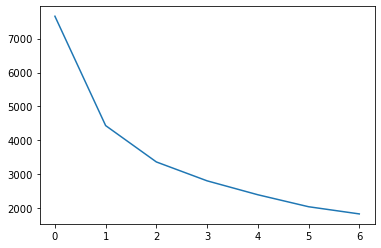

In [31]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(grp_scaled_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(grp_scaled_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(grp_scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4800869204770903
For n_clusters=5, the silhouette score is 0.4646444032280179
For n_clusters=6, the silhouette score is 0.41698971636412085
For n_clusters=7, the silhouette score is 0.4179687531391269
For n_clusters=8, the silhouette score is 0.40117721473337414


In [34]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(grp_scaled_df)

KMeans(max_iter=50, n_clusters=3)

In [35]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [36]:
# assign the label
grp_df['cluster_id'] = kmeans.labels_
grp_df.head()

,CustomerID,amount,Frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


amount


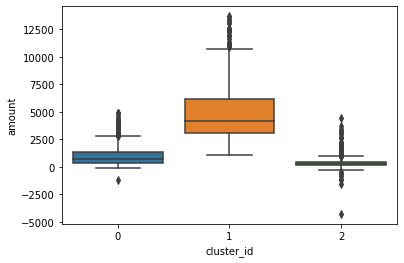

Frequency


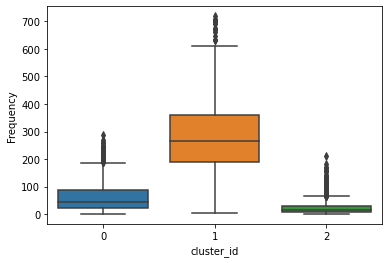

recency


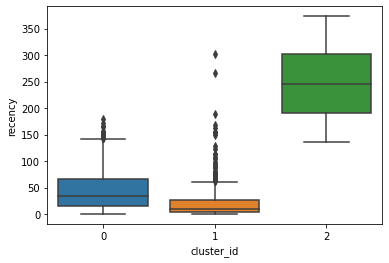

In [37]:
for i in ["amount","Frequency","recency"]:
    print(i)
    plt.figure()
    sns.boxplot(x=grp_df.cluster_id,y=grp_df[i],data = grp_df)
    plt.show()

In [38]:
# final model with k=3
kmeans = KMeans(n_clusters = 3,max_iter = 50)
kmeans.fit(grp_scaled_df)

KMeans(max_iter=50, n_clusters=3)

In [39]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [40]:
# assign the label
grp_df['cluster_id'] = kmeans.labels_
grp_df.head()

,CustomerID,amount,Frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


# Hierarchical Clustering

In [41]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [42]:
grp_df.head()

,CustomerID,amount,Frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


In [43]:
grp_scaled_df.head()

,amount,Frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


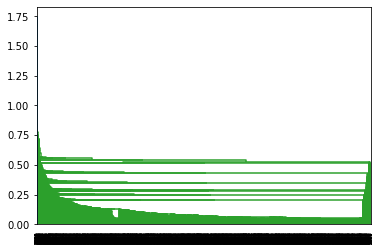

In [44]:
# Let's see what we get with single linkage
link =linkage(grp_scaled_df , method = "single" , metric = "euclidean")
dendrogram(link)  # Found in matplotlib
plt.show()

As the above dendrogram seems to be unreadable for the single linkage so now we will try for complete linkage and look for their dendrogram and will figure out the value of k.

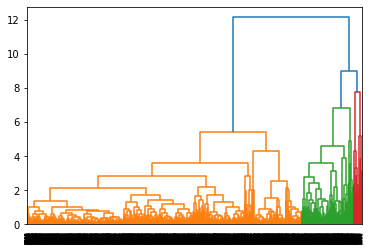

In [45]:
# Let's see what we get with complete linkage
link =linkage(grp_scaled_df , method = "complete" , metric = "euclidean")
dendrogram(link)  # Found in matplotlib
plt.show()

In [46]:
# Giving 3 Cluster
cut_tree(link,n_clusters=3)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [47]:
cut_tree(link,n_clusters=3).shape

(4293, 1)

Now we need to change reshape the above array from (4293, 1) to (4293, )

In [48]:
# Reshaping the array
label = cut_tree(link,n_clusters = 3).reshape(-1,)
# Concating the labels to the dataframe
grp_df["Cluster_hierarchical"] = label
grp_df.head()

,CustomerID,amount,Frequency,recency,cluster_id,Cluster_hierarchical
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,1,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,2,0


Let's plot the boxplot and see the clusters formed

amount


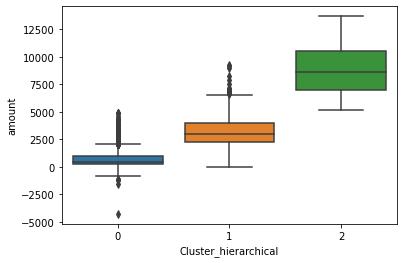

Frequency


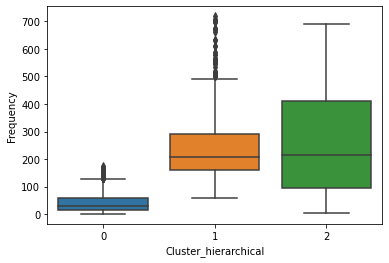

recency


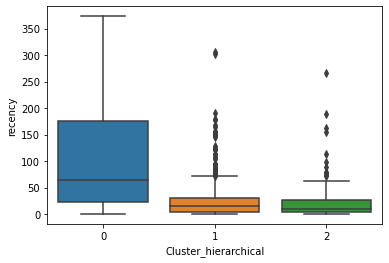

In [49]:
for i in ["amount","Frequency","recency"]:
    print(i)
    plt.figure()
    sns.boxplot(x=grp_df.Cluster_hierarchical,y=grp_df[i],data = grp_df)
    plt.show()

- Yes, now the segmentations seem to be more readable and suffice the business sense for the segmentation as label 2 customer seems to bring more buisness to the store as they are more valuable customer than the other segments.
- Also label 2 customers are largely distributed, though the median fequency for both label 1 and 2 are same.
- Label 1 and 2 are more recently ordered from the store compare to label 0.